In [2]:
import xarray as xr
import numpy as np
import pyproj as proj
import random
import time
import matplotlib.cm as cm
import matplotlib.pyplot as plt
#from sklearn.decomposition import PCA
#from sklearn.decomposition import KernelPCA
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html
#from sklearn.model_selection import KFold
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
#import wpca
# https://github.com/jakevdp/wpca
import time
#from sklearn import cluster, datasets
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
import cartopy.crs as ccrs
#from sklearn.preprocessing import normalize
#from sklearn.metrics import silhouette_samples, silhouette_score, calinski_harabasz_score
import os

# Load scores

In [3]:
Liste_silouhette_25 = np.load('./Scores/Nouvel_classif_no_cor/Liste_silouhette_25.npy', allow_pickle = True)
Liste_silouhette_75 = np.load('./Scores/Nouvel_classif_no_cor/Liste_silouhette_75.npy', allow_pickle = True)
Liste_silouhette_values = np.load('./Scores/Nouvel_classif_no_cor/Liste_silouhette_values.npy', allow_pickle = True)
Liste_CH_score = np.load('./Scores/Nouvel_classif_no_cor/Liste_CH_score.npy', allow_pickle = True)
Liste_BIC_score = np.load('./Scores/Nouvel_classif_no_cor/Liste_BIC_score.npy', allow_pickle = True)
Liste_rscore = np.load('./Scores/Nouvel_classif_no_cor/Liste_rscore.npy', allow_pickle = True)
Liste_rscore_std = np.load('./Scores/Nouvel_classif_no_cor/Liste_rscore_std.npy', allow_pickle = True)
Liste_rscore_sameregion = np.load('./Scores/Nouvel_classif_no_cor/Liste_rscore_sameregion.npy', allow_pickle = True)
Liste_rscore_popregion = np.load('./Scores/Nouvel_classif_no_cor/Liste_rscore_popregion.npy', allow_pickle = True)

In [4]:
Liste_silouhette_avg = np.zeros(len(Liste_silouhette_25))
for i in range(len(Liste_silouhette_25)):
    Liste_silouhette_avg[i] = np.mean(Liste_silouhette_values[i])
    

In [5]:
 n_clusterss = [] 


# w:sqrt-cos, k:cos
for n in range(10,45,1):
    n_clusterss.append(n)
# w:cos, k:cos
for n in range(10,45,1):
    n_clusterss.append(n)


np.save('./Scores/Liste_silouhette_25_m', Liste_silouhette_25_m)
np.save('./Scores/Liste_silouhette_75_m', Liste_silouhette_75_m)
np.save('./Scores/Liste_silouhette_values_m', Liste_silouhette_values_m)
np.save('./Scores/Liste_CH_score_m', Liste_CH_score_m)
np.save('./Scores/Liste_BIC_score_m', Liste_BIC_score_m)
np.save('./Scores/Liste_rscore_m', Liste_rscore_m)
np.save('./Scores/Liste_rscore_std_m', Liste_rscore_std_m)
np.save('./Scores/Liste_rscore_sameregion_m', Liste_rscore_sameregion_m)
np.save('./Scores/Liste_rscore_popregion_m', Liste_rscore_popregion_m)


# Merge scores

In [6]:
Liste_silouhette_avg = np.zeros(len(Liste_silouhette_25))
for i in range(len(Liste_silouhette_25)):
    Liste_silouhette_avg[i] = np.mean(Liste_silouhette_values[i])

# Plot

In [8]:
def rescale(L):
    return (L-np.min(L))/(np.max(L)-np.min(L))

In [ ]:
# plot scores

f, axs = plt.subplots(3,3,figsize=(12,12),sharex=True)
C = ['r', 'b', 'g', 'm', 'k', 'DarkOrange']
Lab = ['W_sc_K_c', 'W_c_K_c', 'W_sq_K_s', 'W_c_K_s', 'W_n_K_s', 'W_n_K_c']
for i in range(6):
    axs[0,0].plot(n_clusterss[35*i:35*(i+1)], Liste_silouhette_avg[35*i:35*(i+1)], c=C[i], label = Lab[i])
    axs[0,1].plot(n_clusterss[35*i:35*(i+1)], Liste_BIC_score[35*i:35*(i+1)], c=C[i])
    axs[0,2].plot(n_clusterss[35*i:35*(i+1)], Liste_CH_score[35*i:35*(i+1)], c=C[i])
    axs[1,0].plot(n_clusterss[35*i:35*(i+1)], Liste_rscore[35*i:35*(i+1)], c=C[i])
    axs[1,1].plot(n_clusterss[35*i:35*(i+1)], Liste_rscore_std[35*i:35*(i+1)], c=C[i])
    axs[1,2].plot(n_clusterss[35*i:35*(i+1)], Liste_rscore_sameregion[35*i:35*(i+1)], c=C[i])
    axs[2,0].plot(n_clusterss[35*i:35*(i+1)], Liste_rscore_popregion[35*i:35*(i+1)], c=C[i])
    
handles1, labels1 = axs[0,0].get_legend_handles_labels()

axs[0,0].set_title('Silhouette score (max)')
axs[0,1].set_title('BIC score (min)')
axs[0,2].set_title('CH score (max ?)')
axs[1,0].set_title('Score différence temps passé par region')
axs[1,1].set_title('Score écart-type temps passé par region')
axs[1,2].set_title('Score points même région')
axs[2,0].set_title('Score pourcentage dans région la plus populaire')
    
f.legend(handles1, labels1,ncol=1,fontsize=20, bbox_to_anchor=(0.525,0.19),loc='center') 
plt.xlabel('# of clusters')    
plt.ylabel('Score')

plt.tight_layout()



In [ ]:
# plot scores

f, axs = plt.subplots(1,2,figsize = (12,5),sharex=True)
C = ['r', 'b', 'g', 'm', 'k', 'DarkOrange']
Lab = ['W_sc_K_c', 'W_c_K_c', 'W_sq_K_s', 'W_c_K_s', 'W_n_K_s', 'W_n_K_c']

for i in range(1):
    axs[0].plot(n_clusterss[35*i:35*(i+1)], rescale(Liste_silouhette_avg[35*i:35*(i+1)]), label = 'silouhette score')
    axs[0].plot(n_clusterss[35*i:35*(i+1)], rescale(Liste_BIC_score[35*i:35*(i+1)]), label = 'BIC')
    axs[0].plot(n_clusterss[35*i:35*(i+1)], rescale(Liste_CH_score[35*i:35*(i+1)]), label = 'CH')
    axs[1].plot(n_clusterss[35*i:35*(i+1)], rescale(Liste_rscore_sameregion[35*i:35*(i+1)]), label = '1st phys. metric')
    axs[1].plot(n_clusterss[35*i:35*(i+1)], rescale(Liste_rscore_popregion[35*i:35*(i+1)]), label = '2nd phys. metric')
    
axs[0].set_title('Numerical metrics')  
axs[1].set_title('Physically based metrics')  
axs[1].xlabel('# of clusters')    
axs[1].ylabel('Score [u.a]')
axs[0].xlabel('# of clusters')    
axs[0].ylabel('Score [u.a]')
axs[0].legend()
axs[1].legend()
plt.tight_layout()



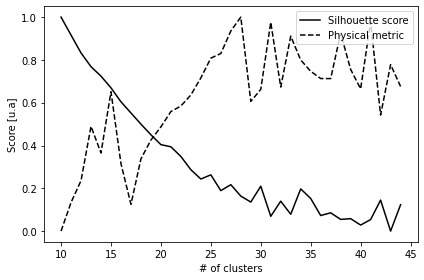

In [18]:
# plot scores for paper
f, ax = plt.subplots(1,1,figsize=(6,4))
i=0
ax.plot(n_clusterss[35*i:35*(i+1)], rescale(Liste_silouhette_avg[35*i:35*(i+1)]), '-k', label = 'Silhouette score')
ax.plot(n_clusterss[35*i:35*(i+1)], rescale(Liste_rscore_popregion[35*i:35*(i+1)]), '--k', label = 'Physical metric')

ax.set_xlabel('# of clusters')    
ax.set_ylabel('Score [u.a]')
plt.legend(loc=1)
plt.tight_layout()
plt.savefig('Figs/Final/Vfinal/metrics.png',dpi=300)